In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df["Age"].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36])

In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

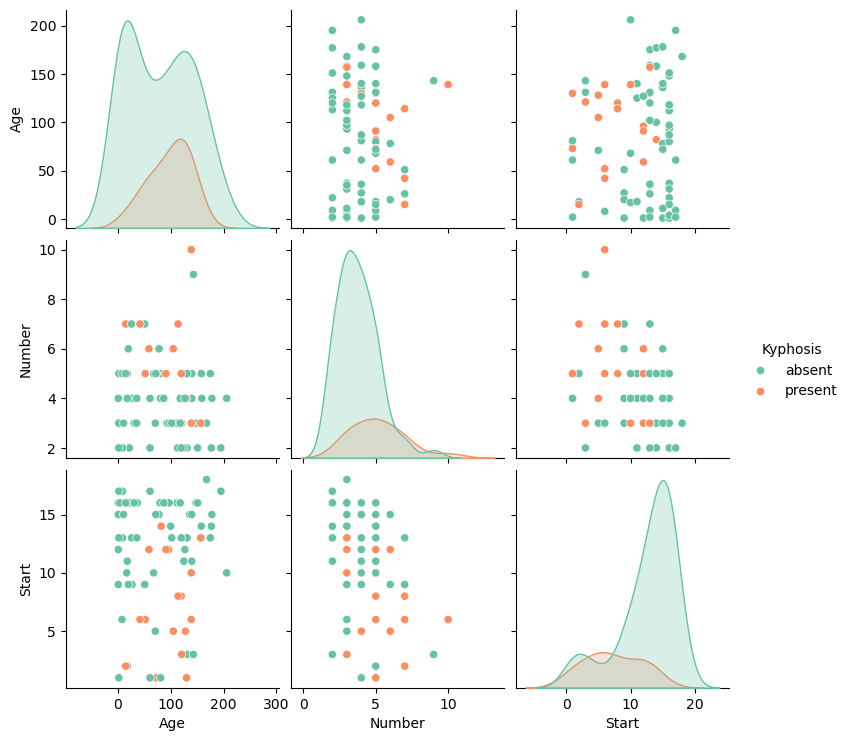

In [8]:
sns.pairplot(df,hue="Kyphosis",palette="Set2")
plt.show()

In [9]:
df[['Age', 'Number', 'Start']].corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("Kyphosis",axis=1)
y=df["Kyphosis"]

In [12]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [13]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [15]:
from sklearn.tree import DecisionTreeClassifier #step 1:Import

In [16]:
tree = DecisionTreeClassifier() #step 2: Instantiate --> Creating an object of the module/algorithm

In [17]:
tree.fit(X_train,y_train) #step 3: Fit --> Learn (Relationship between X train and y train)

DecisionTreeClassifier()

In [18]:
predictions = tree.predict(X_test) #step 4: Predict on test

In [19]:
predictions

array(['present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'absent'], dtype=object)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.81      0.90        16
     present       0.25      1.00      0.40         1

    accuracy                           0.82        17
   macro avg       0.62      0.91      0.65        17
weighted avg       0.96      0.82      0.87        17



In [22]:
tree.classes_

array(['absent', 'present'], dtype=object)

In [23]:
cm = confusion_matrix(y_test,predictions,labels = tree.classes_)
cm

array([[13,  3],
       [ 0,  1]])

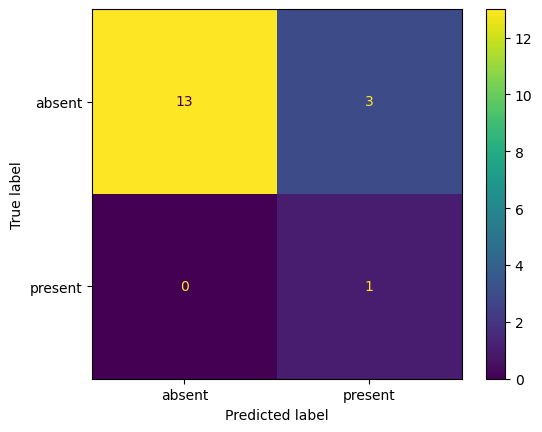

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = tree.classes_)

disp.plot()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=100)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
pred = rfc.predict(X_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent'], dtype=object)

In [29]:
pred_train = rfc.predict(X_train)

In [30]:
print("Training Accuracy:")
print(classification_report(y_train,pred_train))

Training Accuracy:
              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        48
     present       1.00      1.00      1.00        16

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17



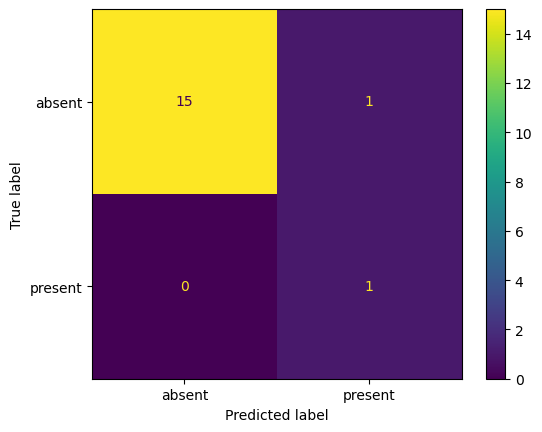

In [31]:
print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred,labels = rfc.classes_)
cm

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rfc.classes_)

disp.plot()
plt.show()

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth=1)

In [34]:
adaboost = AdaBoostClassifier(estimator=dt,n_estimators=200)

In [35]:
adaboost.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [36]:
ypred = adaboost.predict(X_test)


In [37]:
ypred

array(['present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent'], dtype=object)

              precision    recall  f1-score   support

      absent       1.00      0.81      0.90        16
     present       0.25      1.00      0.40         1

    accuracy                           0.82        17
   macro avg       0.62      0.91      0.65        17
weighted avg       0.96      0.82      0.87        17



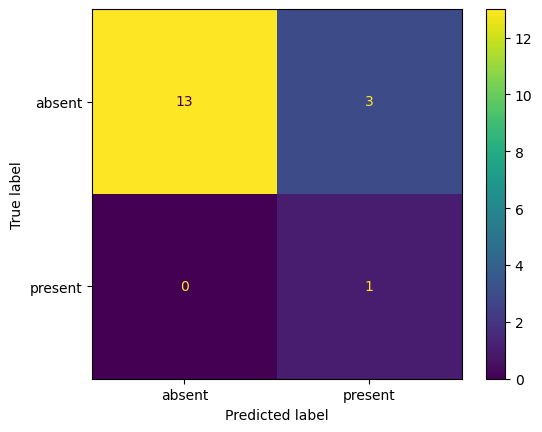

In [38]:
print(classification_report(y_test,ypred))

cm = confusion_matrix(y_test,ypred,labels = adaboost.classes_)
cm

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = adaboost.classes_)

disp.plot()
plt.show()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gb = GradientBoostingClassifier(n_estimators = 200,learning_rate=0.01,min_samples_split=10)

In [41]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=10,
                           n_estimators=200)

In [42]:
gbpred = gb.predict(X_test)
gbpred

array(['present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'present'], dtype=object)

              precision    recall  f1-score   support

      absent       1.00      0.75      0.86        16
     present       0.20      1.00      0.33         1

    accuracy                           0.76        17
   macro avg       0.60      0.88      0.60        17
weighted avg       0.95      0.76      0.83        17



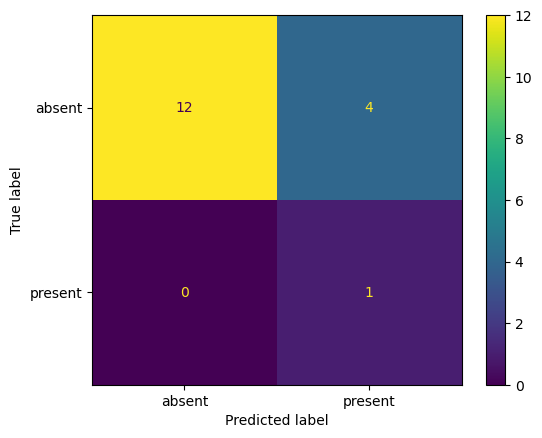

In [43]:
print(classification_report(y_test,gbpred))

cm = confusion_matrix(y_test,gbpred,labels = gb.classes_)
cm

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = gb.classes_)

disp.plot()
plt.show()

In [116]:
#! pip install xgboost

In [118]:
import xgboost as xgb

In [120]:
y = np.where(df["Kyphosis"]=="absent",0,1)

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [124]:
xgb_train = xgb.DMatrix(X_train,y_train,enable_categorical = True)
xgb_test = xgb.DMatrix(X_test,y_test,enable_categorical=True)

In [126]:
params = {'objective':'binary:logistic','max_depth':3,'learning_rate':0.1}
n=50

In [128]:
model = xgb.train(params = params,dtrain=xgb_train,num_boost_round = n)

In [130]:
from sklearn.metrics import accuracy_score


In [132]:
preds = model.predict(xgb_test)

In [137]:
preds = np.where(preds>0.60,1,0)

In [139]:
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [141]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [143]:
accuracy_score(y_test,preds)

0.8823529411764706

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.50      0.50      0.50         2

    accuracy                           0.88        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.88      0.88      0.88        17



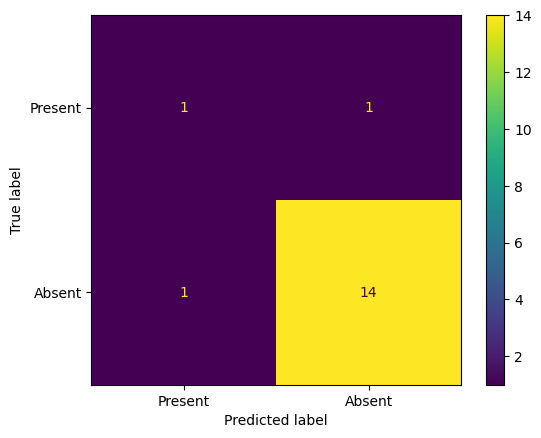

In [145]:
print(classification_report(y_test,preds))

cm = confusion_matrix(y_test,preds,labels = [1,0])
cm

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Present","Absent"])

disp.plot()
plt.show()